# Proyecto Final Curso de Regresión Logística

Dataset utilizado: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## Objetivo
Vamos a clasificar si un tumor es maligno o benigno en base a las características de las células.

## Importamos las librerías necesarias

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

In [2]:
df = pd.read_csv('data.csv')
df.drop_duplicates(inplace=True)
df.dropna(axis=1, inplace=True)
df.set_index('id', inplace=True) #no aporta información para la regresión, pero es útil guardarlo como index para luego poder identificar los casos
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760         0.30010   
842517            0.08474           0.07864         0.08690   
84300903          0.10960           0.15990         0.19740   
84348301          0.14250           0.28390         0.24140   
84358402          0.10030           0.13280         0.19800   
...                   ...               ...             ...   
926424            0.11100           0.11590         0.24390   
926682            0.09780           0.10340         0.14400   
926954            0.08455           0.10230         0.09251   
927241            0.11780           0.27700         0.35140   
92751             0.05263           0.04362         0.00000   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
842302                0.14710         0.2419  ...        25.380   
842517                0.07017         0.1812  ...        24.990   
84300903              0.12790         0.2069  ...        23.570   
84348301              0.10520         0.2597  ...        14.910   
84358402              0.10430         0.1809  ...        22.540   
...                       ...            ...  ...           ...   
926424                0.13890         0.1726  ...        25.450   
926682                0.09791         0.1752  ...        23.690   
926954                0.05302         0.1590  ...        18.980   
927241                0.15200         0.2397  ...        25.740   
92751                 0.00000         0.1587  ...         9.456   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0           0.16220   
842517            23.41           158.80      1956.0           0.12380   
84300903          25.53           152.50      1709.0           0.14440   
84348301          26.50            98.87       567.7           0.20980   
84358402          16.67           152.20      1575.0           0.13740   
...                 ...              ...         ...               ...   
926424            26.40           166.10      2027.0           0.14100   
926682            38.25           155.00      1731.0           0.11660   
926954            34.12           126.70      1124.0           0.11390   
927241            39.42           184.60      1821.0           0.16500   
92751             30.37            59.16       268.6           0.08996   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302              0.66560           0.7119                0.2654   
842517              0.18660           0.2416                0.1860   
84300903            0.42450           0.4504                0.2430   
84348301       

In [3]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [4]:
df.dtypes
#todo es float64, no hay que hacer conversión de tipos
#con excepción de la variable diagnosis, que es object debemos convertirla a numérica para poder usarla en la regresión logística

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [5]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

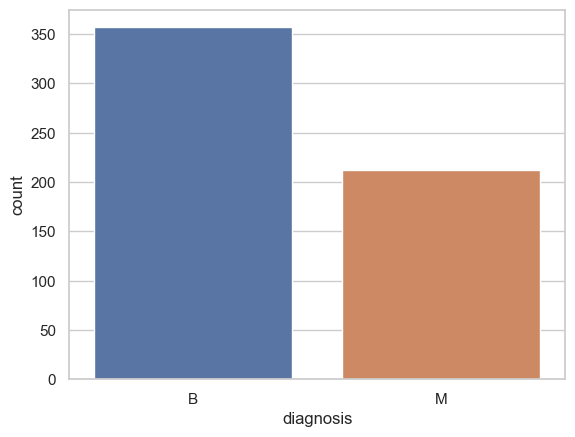

In [6]:
# Hace que se muestren las clases del mayor a menor count
# Si no hacemos esto, las columnas apareceran conforme aparezcan en el dataframe
orden = df.diagnosis.value_counts().index

# Asumiendo que df es tu DataFrame y 'Class' es la columna de interés
sns.countplot(data=df, x='diagnosis', order = orden)
#plt.xticks(rotation=45)
plt.show()

Nuestros datos están desbalanceados.
* El modelo aprenderá a clasificar mejor a Benevolentes que Malevolentes
* Esto afectará fuertemente el desempeño de nuestra regresión logística

Hay dos maneras de resolver:
* Reducir todos los dataset a la cantidad de datos de la clase mínima (Malevolente) (Tiene la contra de que perdemos información)
* Empezar a crear ejemplos con la misma desviación estándar/varianza/parámetros o características de cada clase para subir todas las barras a la misma altura, problema: creamos ejemplos que necesariamente no son ciertos

Como tenemos 212 observaciones de Malevolentes, vamos a reducir las observaciones Benevolentes a 212 (undersampling)

In [7]:
"""
df_diagnostico = df['diagnosis']
df["diagnosis"] = pd.Categorical(df["diagnosis"], categories=orden).codes
df
"""

'\ndf_diagnostico = df[\'diagnosis\']\ndf["diagnosis"] = pd.Categorical(df["diagnosis"], categories=orden).codes\ndf\n'

In [8]:
# para usar imblearn debe instalarse "imbalanced-learn"
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [9]:
X = df.drop('diagnosis',axis=1)
y = df.diagnosis
X_over , y_over = undersample.fit_resample(X,y) 
#Hace undersample de "y" que son las clases y guarda los valores de "X" que corresponde a cada observación sampleada

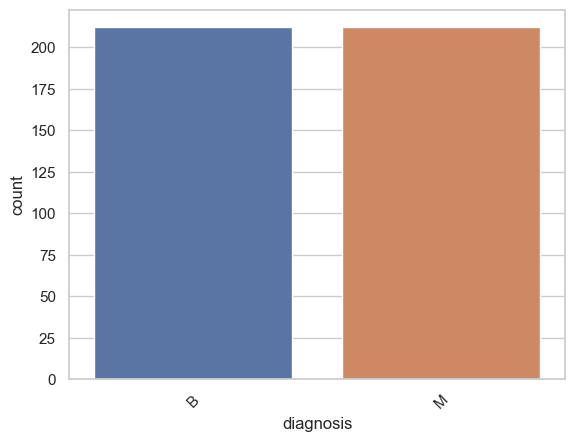

In [10]:
sns.countplot(x = y_over, order = orden) #porque y_over es una series

# sns.countplot(data = pd.DataFrame(y_over), x = 'Class', order=orden) #esto es para usarlo como un dataframe
plt.xticks(rotation=45)
plt.show()

## Conversión de diagnosticos a datos numéricos

In [11]:
df_codificado = pd.DataFrame( pd.Categorical(y_over, categories=orden), columns=['diagnosis'] )
df_codificado['cod'] =  pd.Categorical(y_over, categories=orden).codes
df_codificado.drop_duplicates(inplace=True)
df_codificado.reset_index(drop=False, inplace=True)
df_codificado

index diagnosis  cod
0      0         B    0
1    212         M    1

In [12]:
# df.Class = pd.Categorical(df.Class, categories = orden).codes #No usaremos df, sino y_over
y_over = pd.Categorical(y_over, categories=orden).codes
y_over = y_over #Esto lo hacemos para que la regresión funcione bien, ya que no puede con valor cero
np.unique(y_over)

array([0, 1], dtype=int8)

## Análisis exploratorio de datos

### Correlaciones
Variables altamente correlacionadas pueden afectar el rendimiento de nuestro modelo

In [13]:
df_dea = X_over.copy() #dea porque? pero es para analizar todo en conjunto
df_dea["diagnosis"] = y_over

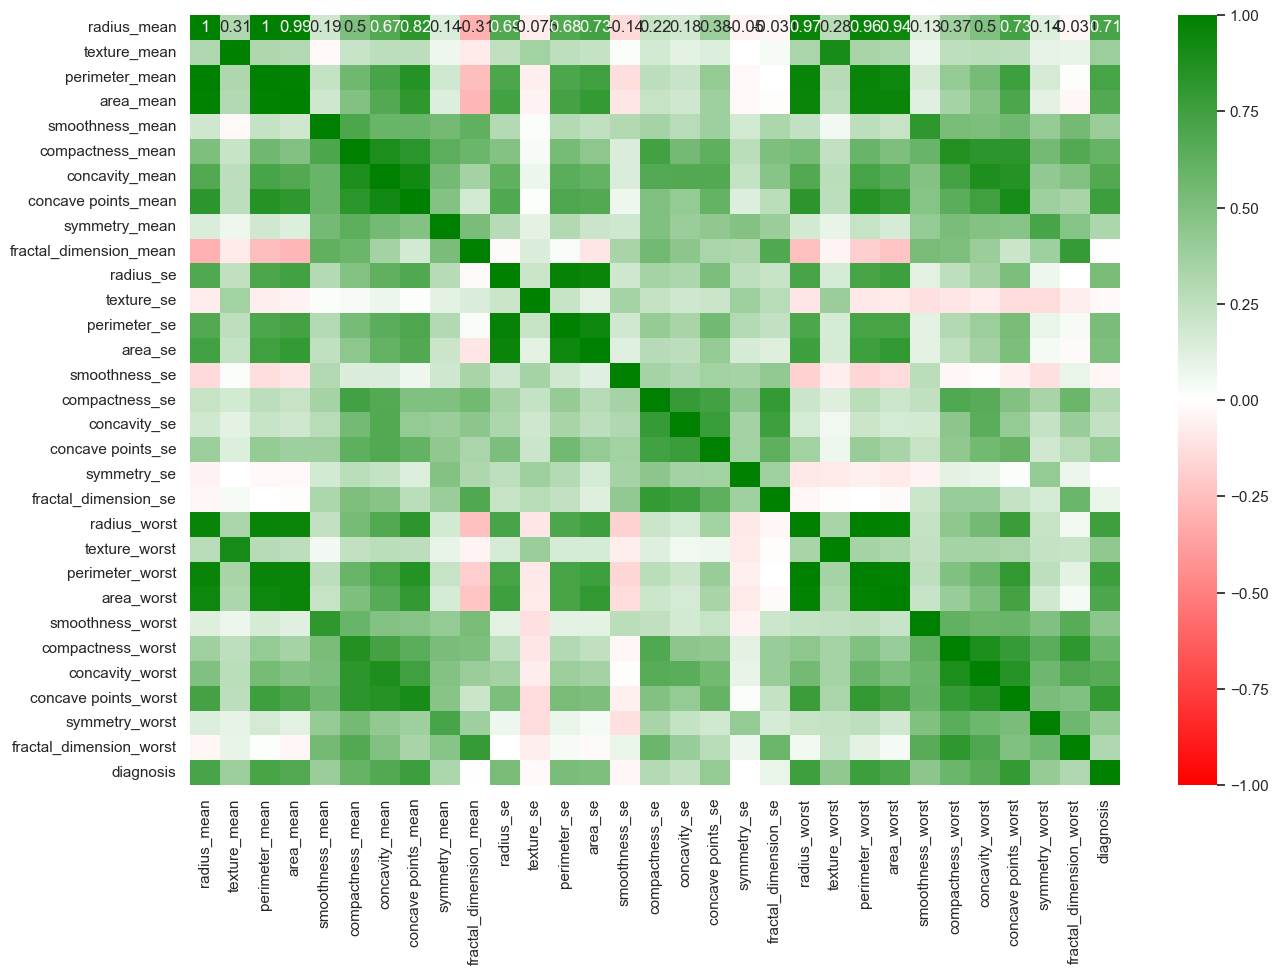

In [14]:
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["red", "w", "green"], N=256) #para entender más facil las correlaciones

plt.figure(figsize=(15,10))
sns.heatmap(df_dea.corr(), cmap=cmap,annot=True, vmin = -1, vmax=1)
plt.show()

Hay alta correlación entre:
* radius_mean y perimeter_mean
* perimeter_mean y area_mean
* area_mean y radius_mean
* radius_worst y area_worst
...

La mejor opción sería eliminar o las variables de radio, o las de perímetro o las de área

por principio de parsimonia conviene tener la menor cantidad de datos y considerando que las células tienden a tener formas esféricas, vamos a eliminar las variables de perímetro y área.

In [15]:
X_over.drop(['perimeter_mean','perimeter_se','perimeter_worst','area_mean','area_se','area_worst'],axis=1,inplace= True)
df_dea = X_over.copy() #dea porque? pero es para analizar todo en conjunto
df_dea["diagnosis"] = y_over


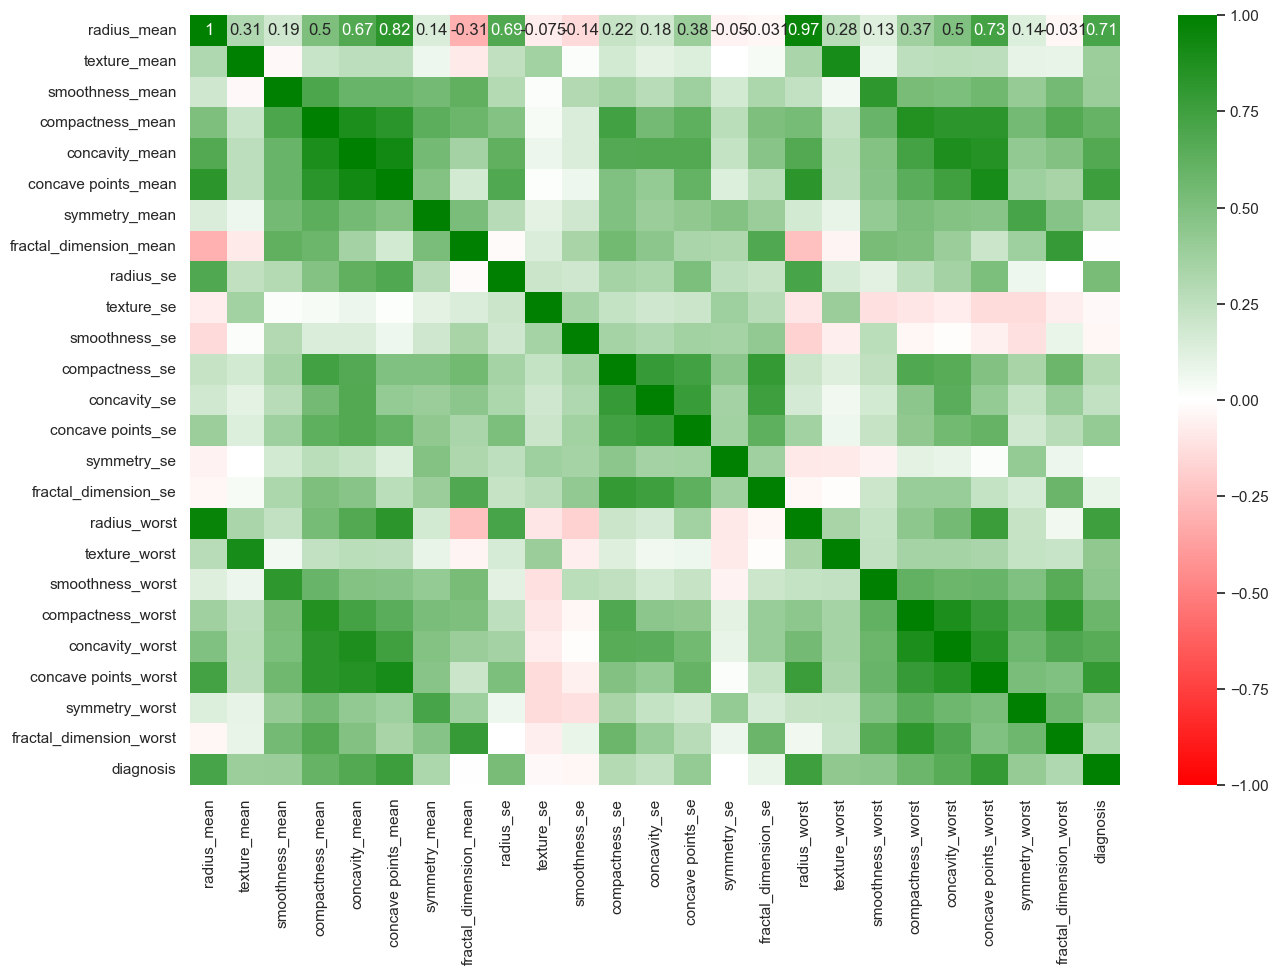

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dea.corr(), cmap=cmap,annot=True, vmin = -1, vmax=1)
plt.show()

También se puede apreciar una fuerte correlación entre las variables worst y las mean, por lo que también vamos a eliminar las variables worst.

In [17]:
X_over.drop(['radius_worst', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],axis=1,inplace= True)
df_dea = X_over.copy() #dea porque? pero es para analizar todo en conjunto
df_dea["diagnosis"] = y_over

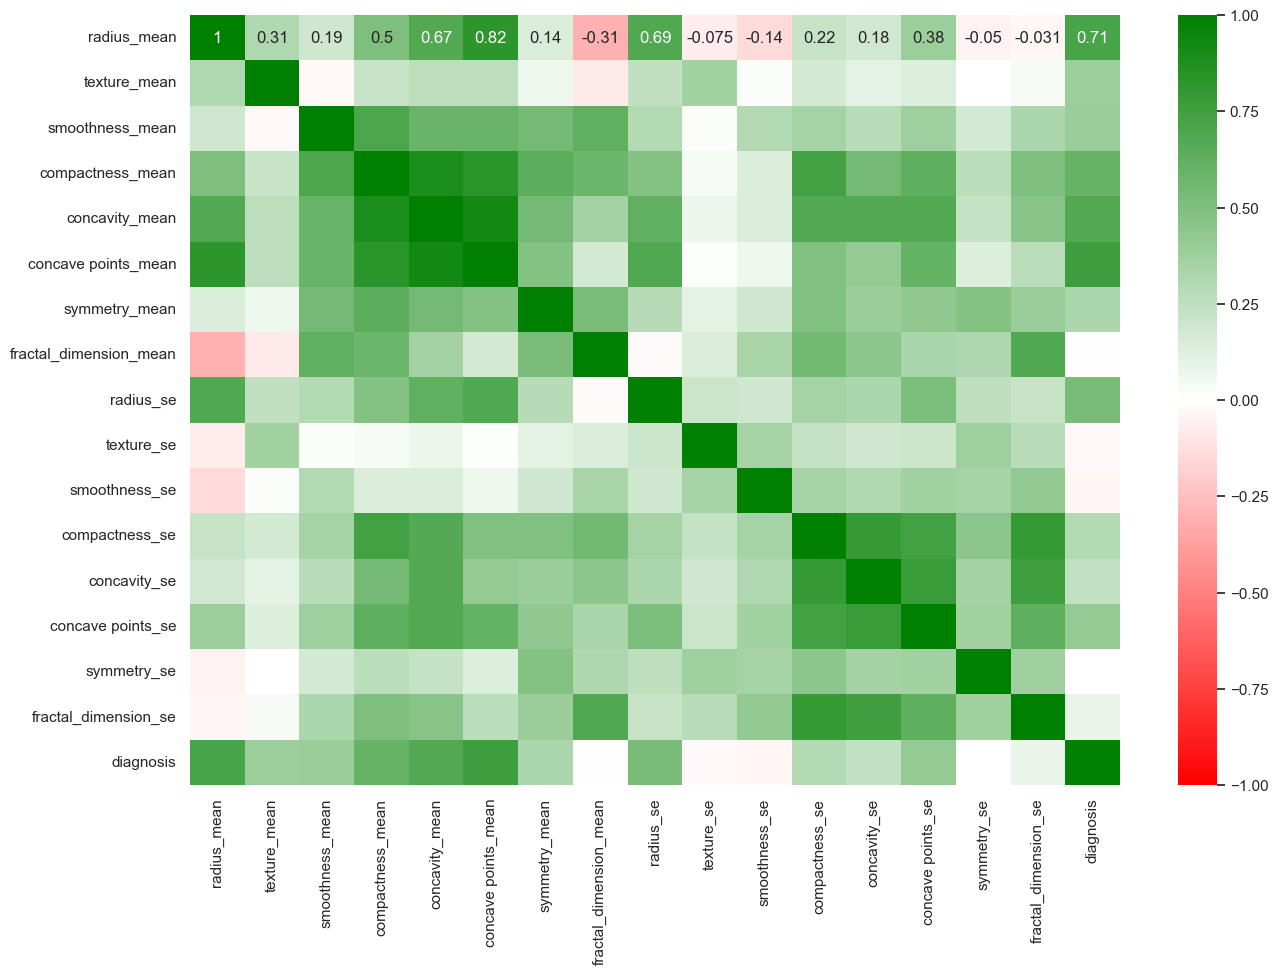

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dea.corr(), cmap=cmap,annot=True, vmin = -1, vmax=1)
plt.show()

## Visualizar datos

c:\Users\Juan_Manuel\anaconda3\envs\python_fix\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Juan_Manuel\anaconda3\envs\python_fix\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Juan_Manuel\anaconda3\envs\python_fix\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Juan_Manuel\anaconda3\envs\python_fix\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

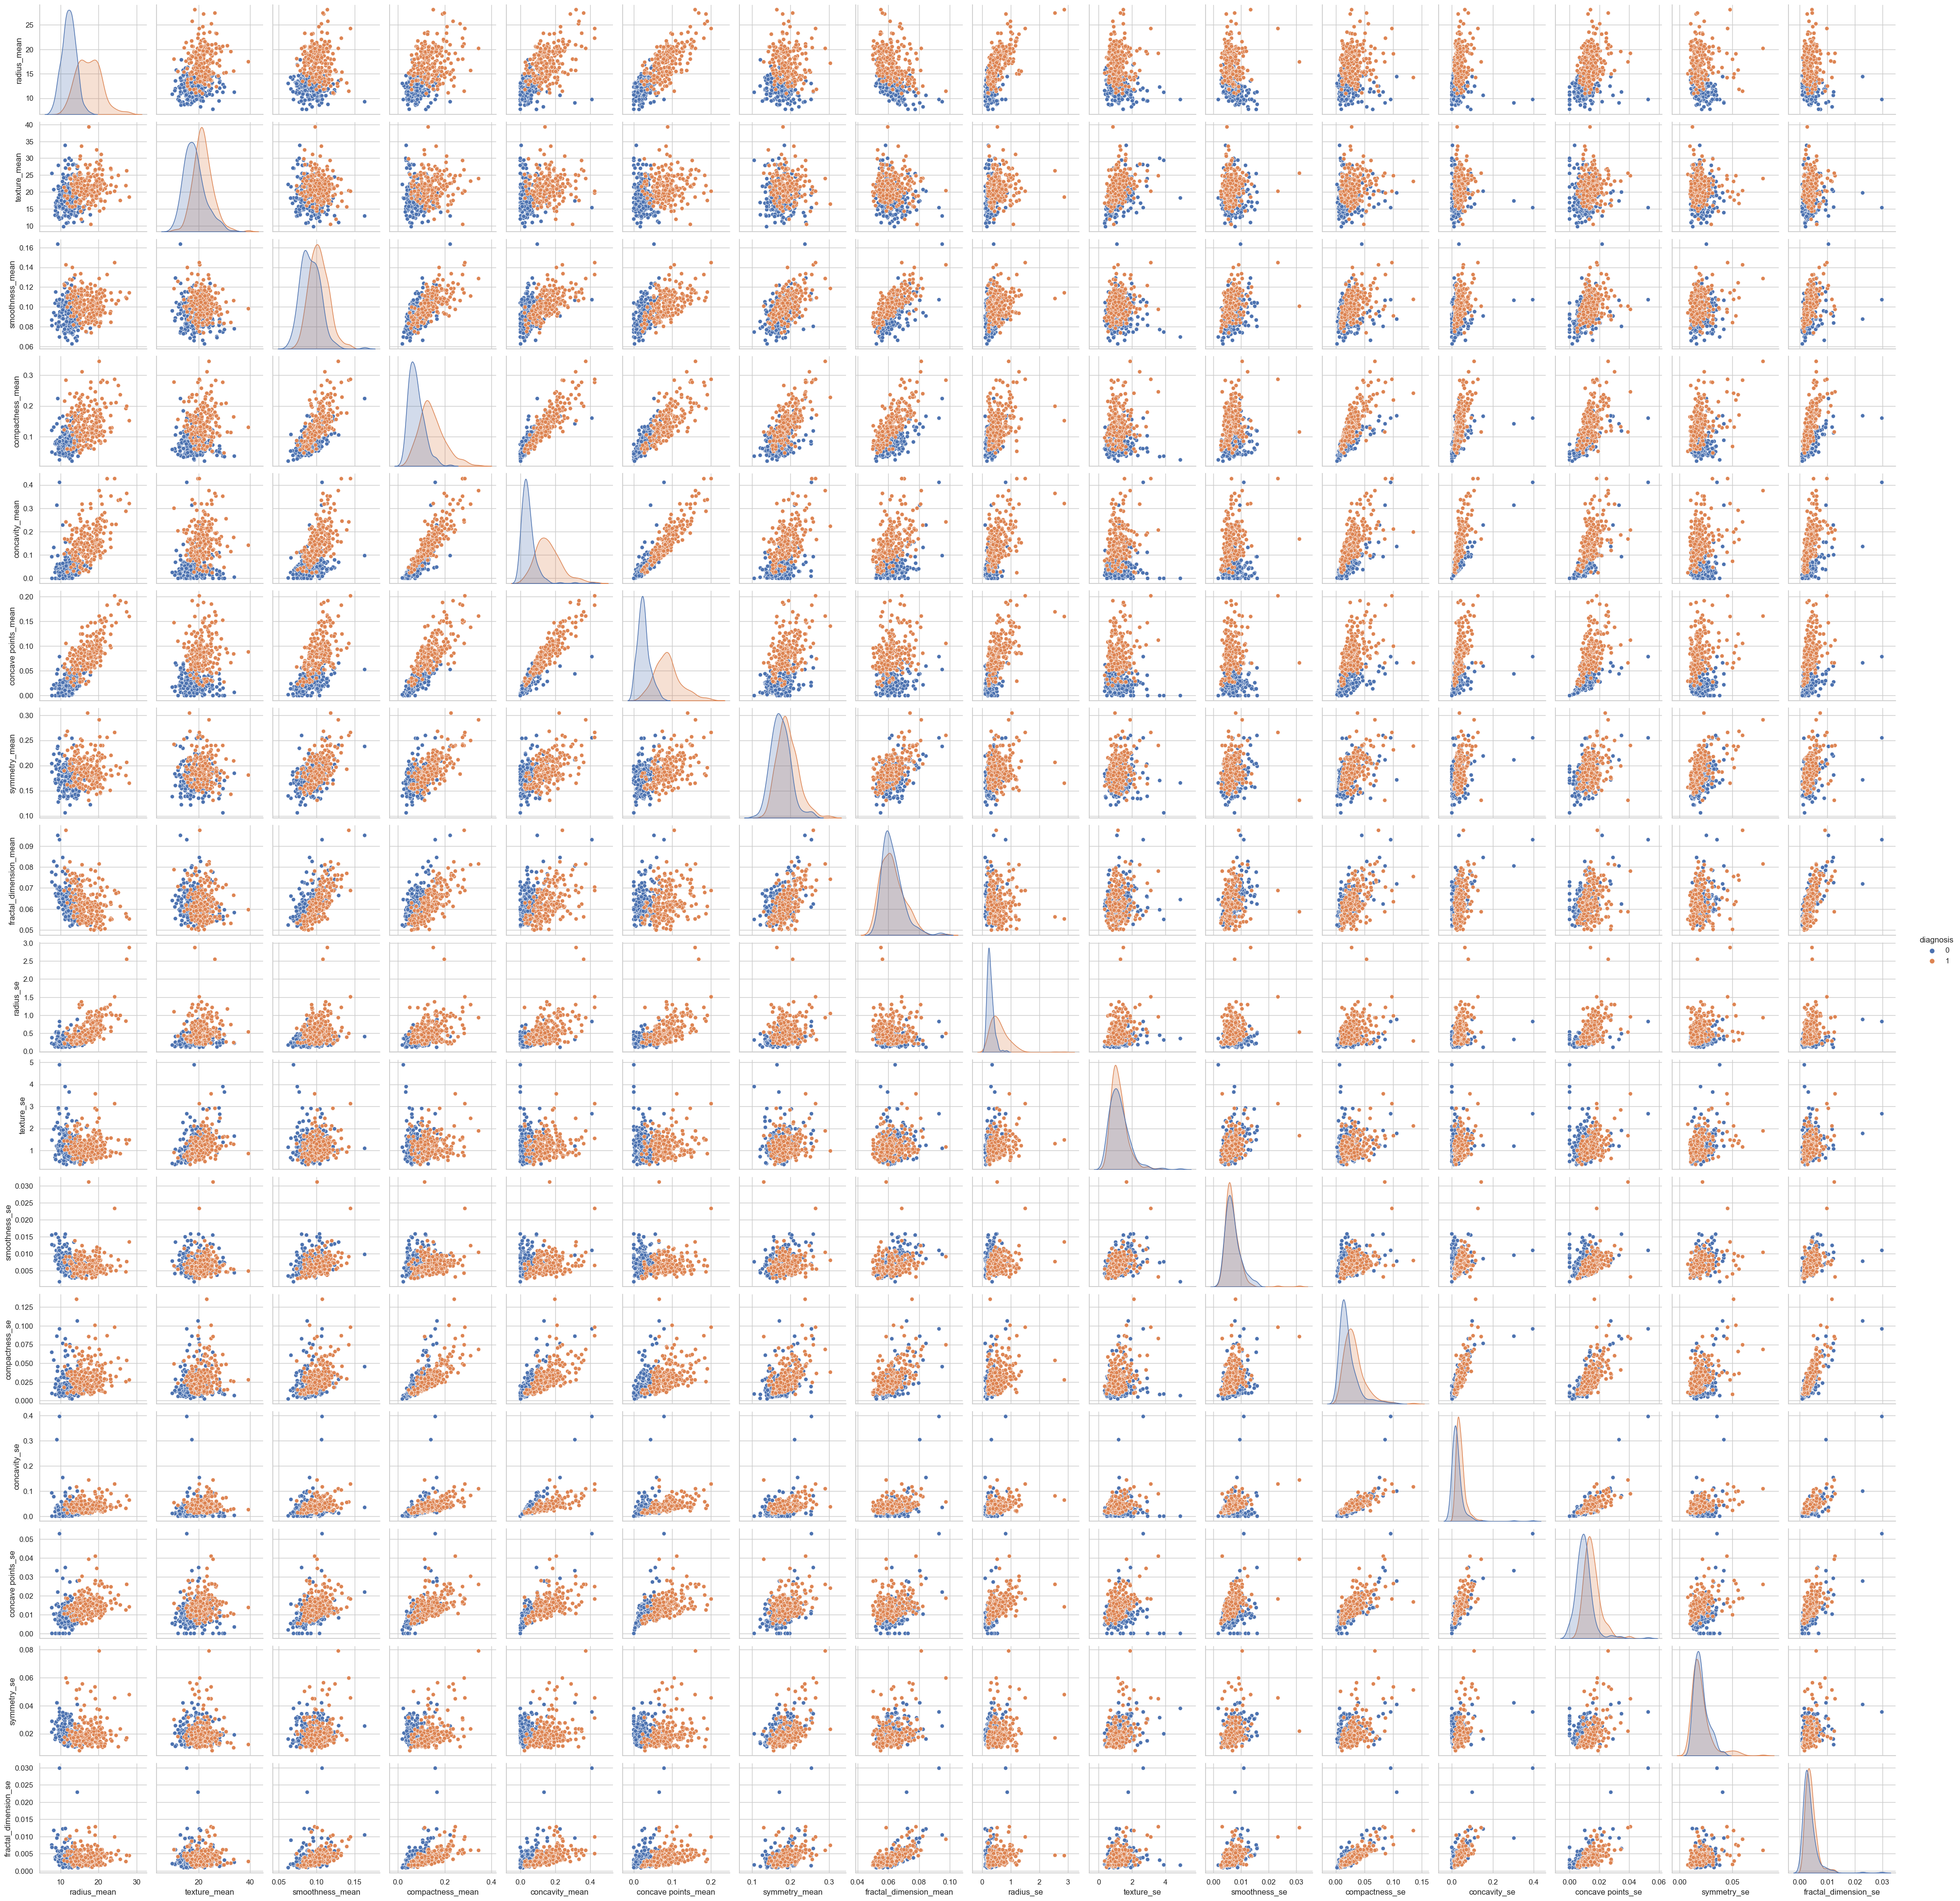

In [19]:
sns.pairplot(df_dea, hue='diagnosis')

Son muchas variables, pero a grueso modo se puede apreciar que hay una marcada diferencia entre las variables de las células malevolentes y las benevolentes.

Se procede con el modelo

## Split y escalamiento de datos

In [20]:
X_train, X_test, y_train , y_test = train_test_split(X_over, y_over, random_state=42, shuffle=True, test_size= .2)
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train) 
X_test = st_x.transform(X_test)

# Modelo binomial

In [21]:
def logistic_model(C_,solver_ , multiclass_):
    logistic_regression_model = LogisticRegression(random_state=42, solver= solver_, multi_class= multiclass_, n_jobs=-1, C=C_ )
    #n_jobs=-1 para que use todos los procesadores

    return logistic_regression_model

In [22]:
multiclass = ['ovr','multinomial'] #ovr (one over rest) es para que funcione con dos clases, multinomial para más de dos
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'] #todos los solvers que funcionan con multinomial
scores = []
params=[]
for i in multiclass:
    for j in solver_list:
        try:  #try porque no todos los solvers funcionan con todas las multiclases
            model = logistic_model(1,j,i)
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            params.append(i + '-'+ j)
            accuraccy = accuracy_score(y_test,predictions)
            scores.append(accuraccy)
        except:
            None   

c:\Users\Juan_Manuel\anaconda3\envs\python_fix\lib\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\Users\Juan_Manuel\anaconda3\envs\python_fix\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Juan_Manuel\anaconda3\envs\python_fix\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Juan_Manuel\anaconda3\envs\python_fix\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Juan_Manuel\anaconda3\envs\python_fix\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did no

## Evaluación de resultados

c:\Users\Juan_Manuel\anaconda3\envs\python_fix\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


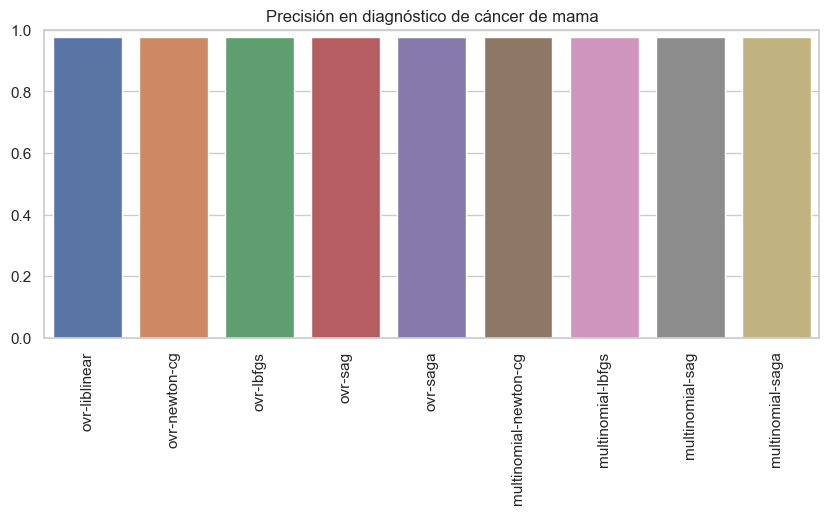

In [23]:
import math
fig = plt.figure(figsize=(10,4))
sns.barplot(x=params, y=scores).set_title('Precisión en diagnóstico de cáncer de mama')
#plt.ylim(math.floor(min(scores)*100)/100, max(scores))  # Establecer los límites para el eje Y
plt.ylim(0, 1)  # Establecer los límites para el eje Y

plt.xticks(rotation=90)
plt.show()

In [24]:
pd.DataFrame({'params':params, 'scores':scores}).sort_values(by='scores', ascending=False)

params    scores
0          ovr-liblinear  0.976471
1          ovr-newton-cg  0.976471
2              ovr-lbfgs  0.976471
3                ovr-sag  0.976471
4               ovr-saga  0.976471
5  multinomial-newton-cg  0.976471
6      multinomial-lbfgs  0.976471
7        multinomial-sag  0.976471
8       multinomial-saga  0.976471

In [25]:
mejor_modelo = params[scores.index(max(scores))]
mejor_modelo

'ovr-liblinear'

La gran mayoría tienen un accuracy cercano al 1: **la regresión logística es un buen modelo para este dataset**

'ovr-liblinear' resuelve mucho mejor que otros solvers, lo usaremos (aunque no se note mucha diferencia entre OVR o Multinomial, pero si vale la pena analizar ambos, además de como se desenvuelve el modelo con distintos solvers)

In [26]:
model = logistic_model(1,'newton-cg','multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[44  2]
 [ 0 39]]
0.9764705882352941


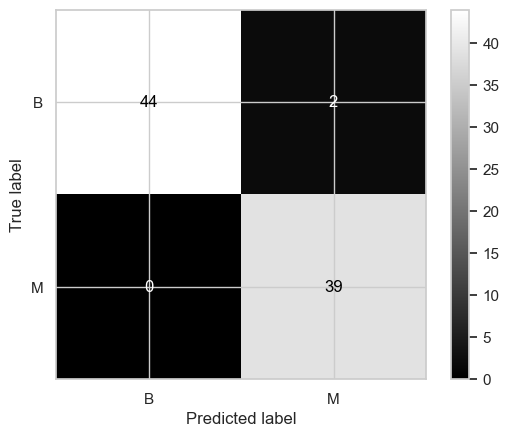

In [27]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=orden) #coloque orden porque al inicio lo definimos al hacer nuestro pd.Categorical
disp.plot(cmap='gray')
plt.show()

Esto se obtuvo del X_test
Nos generó y_pred y comparamos con y_test

Esto nos muestra que el modelo está bien entranado y predice bien

lo que nos faltaría ahora es pronosticar con datos nuevos

El modelo tuvo un Accuaracy de 97.65% con el X_test